In [26]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar  8 15:08:44 2022

@author: Wenhao Hsu
"""
from rdkit.Chem import AllChem
from rdkit import Chem
from sklearn import svm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [27]:
def get_fp_mat( SMILES_list ):
    """
    do: generate the morgan-fingerprints and save it as matrix
    SMILES_list: The list of SMILES string
    OUTPUT: morgan-fingerprints matrix
    """
    fps = []
    for SMILES_string in SMILES_list:
        mol = Chem.MolFromSmiles(SMILES_string)
        fp = AllChem.GetMorganFingerprintAsBitVect(mol,3,useFeatures=False, nBits=2048).ToBitString()
        fps.append(fp)
    bits = []
    for fp in fps:
        bit_list = []
        for bit in fp:
            bit_list.append( int(bit) )
        bits.append(bit_list)
    return bits

In [28]:
# get data set from filepath and do the data cleaning
dataset_path = './data/csv/washed_data_train.csv'
df = pd.read_csv(dataset_path)
df = df.dropna(subset=['lambda_onset'])
df = df.dropna(subset=['Non_fixed?'])
df = df.reset_index(drop=True)
print('\nImported trainset from '+ dataset_path+', shape: '+str(np.shape(df)))


Imported trainset from ./data/csv/washed_data_train.csv, shape: (246, 46)


In [29]:
# generate the morgan fingerprints and append it to dataframe
x = pd.DataFrame(get_fp_mat(df['SMILES'])).reset_index(drop=True)
y = pd.DataFrame(df['lambda_onset']) 
print('The shape of morgan-finger print as array x          : '+str(np.shape(x)))
print('The shape of feature as array y                      : '+str(np.shape(y)))

The shape of morgan-finger print as array x          : (246, 2048)
The shape of feature as array y                      : (246, 1)


In [30]:
x['Mol.wt'] = df['Mol.wt']
x['Non_fixed?'] = df['Non_fixed?']
print('The shape of morgan-finger print + Mol.wt + Non_fixed?  as array x          : '+str(np.shape(x)))

The shape of morgan-finger print + Mol.wt + Non_fixed?  as array x          : (246, 2050)


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
# from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from matplotlib import pyplot

In [32]:
models=[LinearRegression(),KNeighborsRegressor(),SVR(),Ridge(),Lasso(),MLPRegressor(),DecisionTreeRegressor(),ExtraTreeRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),BaggingRegressor()] # ,XGBRegressor()
models_str=['Linear Regression','KNNRegressor','SVR','Ridge','Lasso','MLPRegressor','DecisionTree','ExtraTree','RandomForest','AdaBoost','GradientBoost','Bagging'] # ,'XGBoost'

results = list()
for name,model in zip(models_str,models):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=2022)
	n_scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_percentage_error', cv=cv, n_jobs=-1)
	print('>%s: %.3f (%.3f)' % (name, np.mean(n_scores), np.std(n_scores)))
	results.append(n_scores)



>Linear Regression: -671.255 (3561.592)
>KNNRegressor: -0.073 (0.014)
>SVR: -0.073 (0.012)
>Ridge: -0.033 (0.007)
>Lasso: -0.043 (0.007)
>MLPRegressor: -0.231 (0.120)
>DecisionTree: -0.046 (0.013)
>ExtraTree: -0.045 (0.012)
>RandomForest: -0.037 (0.009)
>AdaBoost: -0.049 (0.008)
>GradientBoost: -0.038 (0.007)
>Bagging: -0.040 (0.009)


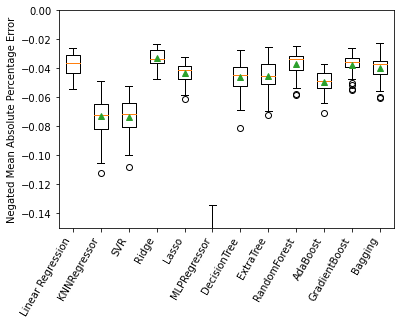

In [33]:
plt.rcParams['savefig.dpi'] = 200 #图片像素
plt.rcParams['figure.dpi'] = 100 #分辨率
plt.ylim(-.15,0)
plt.xticks(rotation=60,ha = 'right')
plt.ylabel(u'Negated Mean Absolute Percentage Error',fontsize=10)
pyplot.boxplot(results, labels=[n for n in models_str], showmeans=True)
pyplot.show()

In [34]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x.reset_index(drop=True))

In [35]:
models=[LinearRegression(),KNeighborsRegressor(),SVR(),Ridge(),Lasso(),MLPRegressor(),DecisionTreeRegressor(),ExtraTreeRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),BaggingRegressor()] # ,XGBRegressor()
models_str=['Linear Regression','KNNRegressor','SVR','Ridge','Lasso','MLPRegressor','DecisionTree','ExtraTree','RandomForest','AdaBoost','GradientBoost','Bagging'] # ,'XGBoost'

results = list()
for name,model in zip(models_str,models):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=2022)
	n_scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_percentage_error', cv=cv, n_jobs=-1)
	print('>%s: %.3f (%.3f)' % (name, np.mean(n_scores), np.std(n_scores)))
	results.append(n_scores)

>Linear Regression: -125426148259.251 (110126436467.289)
>KNNRegressor: -0.047 (0.009)
>SVR: -0.071 (0.012)
>Ridge: -0.036 (0.008)
>Lasso: -0.035 (0.008)
>MLPRegressor: -0.505 (0.076)
>DecisionTree: -0.046 (0.012)
>ExtraTree: -0.046 (0.011)
>RandomForest: -0.037 (0.008)
>AdaBoost: -0.049 (0.008)
>GradientBoost: -0.037 (0.008)
>Bagging: -0.038 (0.009)


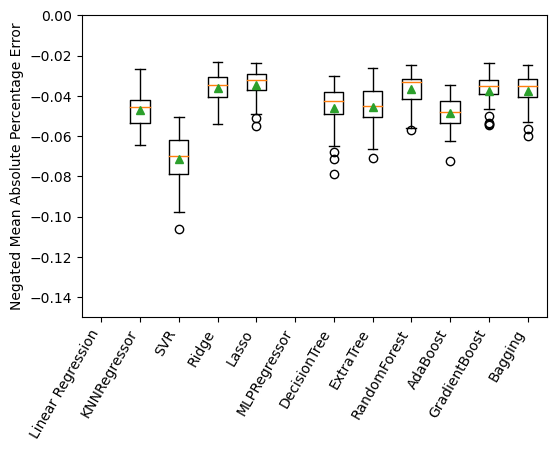

In [36]:
plt.rcParams['savefig.dpi'] = 200 #图片像素
plt.rcParams['figure.dpi'] = 100 #分辨率
plt.ylim(-.15,0)
plt.xticks(rotation=60,ha = 'right')
plt.ylabel(u'Negated Mean Absolute Percentage Error',fontsize=10)
pyplot.boxplot(results, labels=[n for n in models_str], showmeans=True)
pyplot.show()